In [1]:
pip install pandas matplotlib seaborn scipy numpy

=== Airbnb Madrid Analysis ===

1. Room Types Analysis


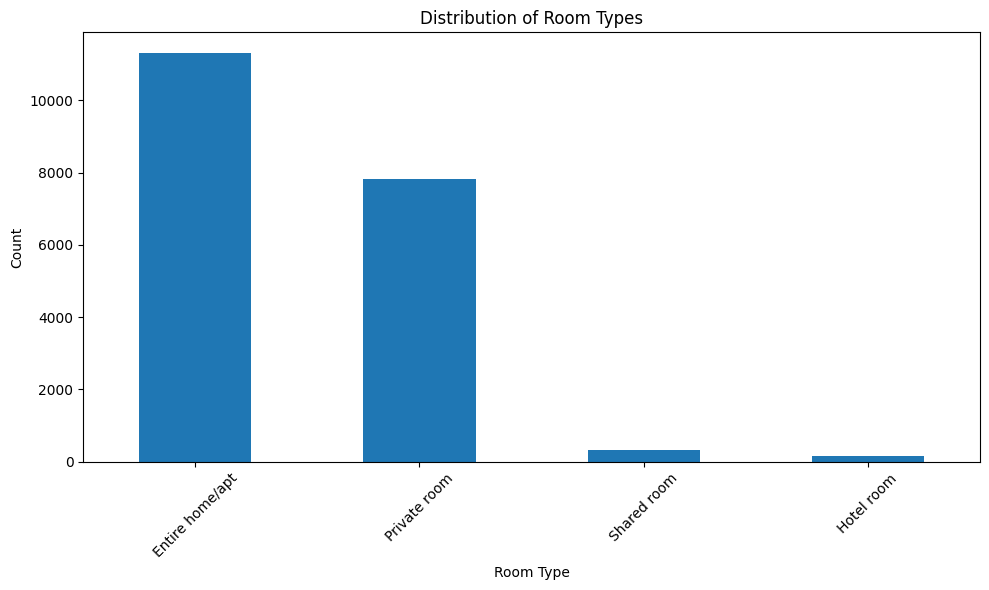


Room Type Distribution:
room_type
Entire home/apt    11314
Private room        7809
Shared room          329
Hotel room           166
Name: count, dtype: int64

Percentage of shared rooms: 1.68%

2. Neighborhood Distribution


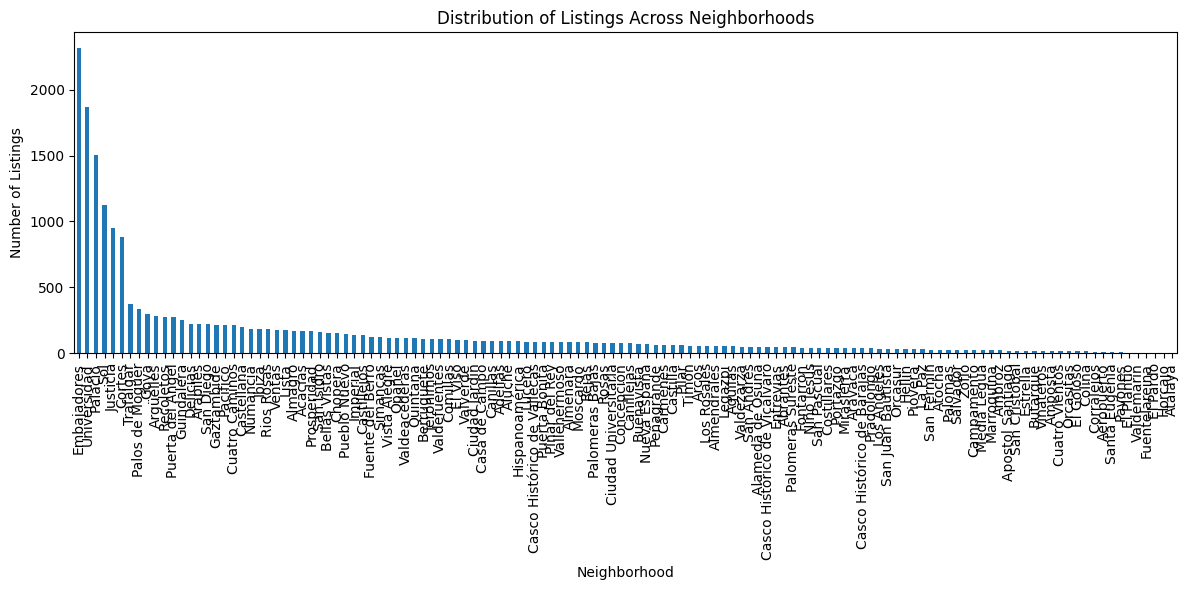


Neighborhood Statistics:
Average listings per neighborhood: 153.27
Standard deviation: 317.42

Top 5 neighborhoods by number of listings:
neighbourhood_cleansed
Embajadores    2318
Universidad    1869
Palacio        1506
Sol            1125
Justicia        951
Name: count, dtype: int64

3. Host Properties Analysis

Host Property Statistics:
Total number of unique hosts: 11325
Average properties per host: 1.73

Top 10 hosts by number of properties:
host_id
377605855    163
28038703     113
276565844    101
102196656    101
32046323      92
107141654     88
99018982      72
247570318     69
28786243      67
107335103     66
Name: count, dtype: int64


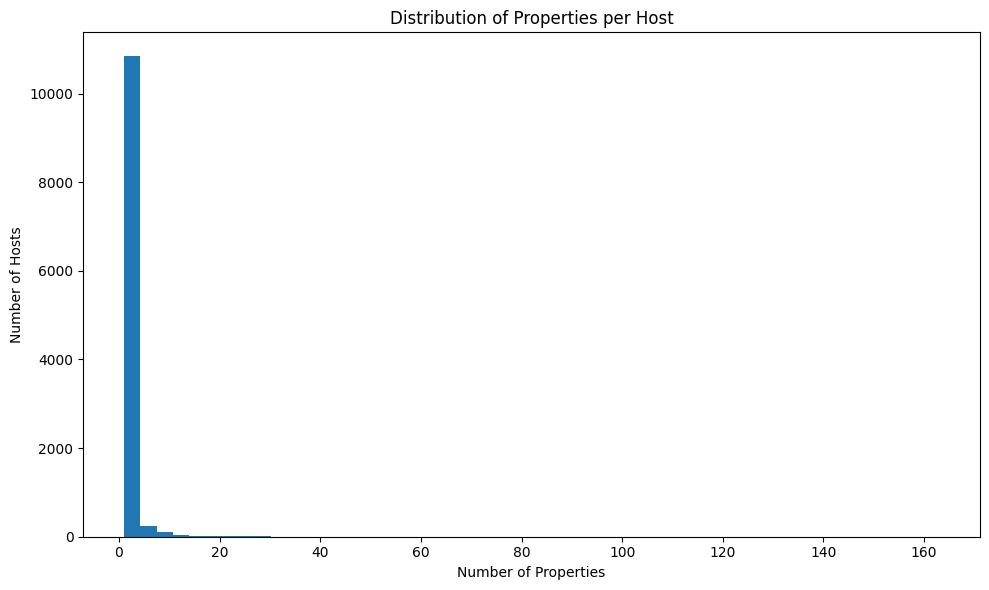


4. Price Analysis by Language

Price Analysis by Language:
Average price for English listings: $129.23
Average price for Spanish listings: $129.66

t-statistic: -0.0346
p-value: 0.9724

5. Price Factors Analysis

Correlations with Price:
accommodates: 0.1290
bathrooms: nan
bedrooms: 0.1437
beds: 0.0900
review_scores_rating: 0.0069


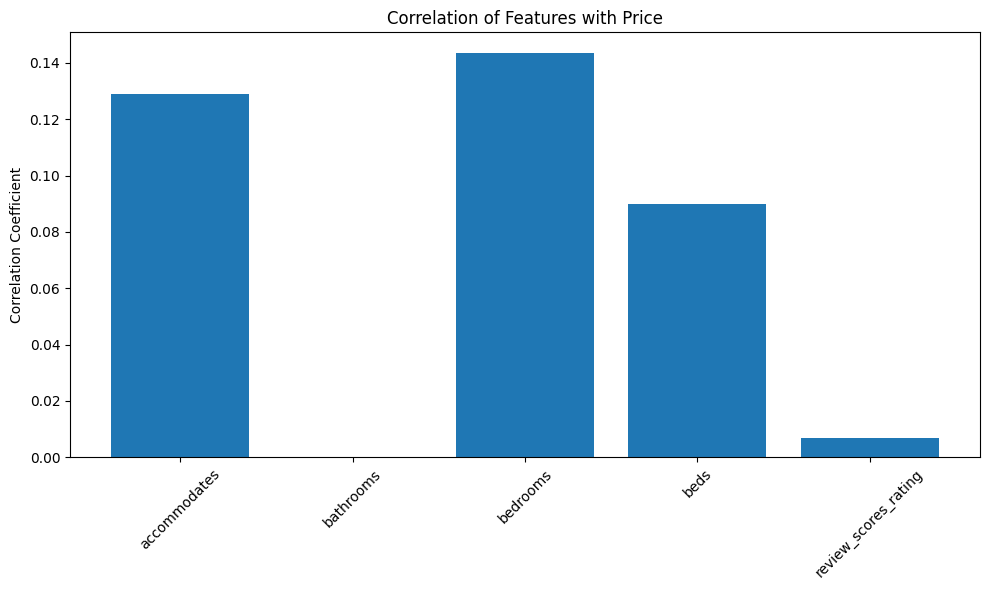

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Read the data
df = pd.read_csv('/content/listings_detailed.csv')

# 1. Analysis of room types
def analyze_room_types():
    room_type_counts = df['room_type'].value_counts()

    plt.figure(figsize=(10, 6))
    room_type_counts.plot(kind='bar')
    plt.title('Distribution of Room Types')
    plt.xlabel('Room Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    print("\nRoom Type Distribution:")
    print(room_type_counts)
    percent_shared = ((df['room_type'] == 'Shared room').sum() / len(df)) * 100
    print(f"\nPercentage of shared rooms: {percent_shared:.2f}%")

# 2. Neighborhood distribution analysis
def analyze_neighborhoods():
    neighborhood_counts = df['neighbourhood_cleansed'].value_counts()

    plt.figure(figsize=(12, 6))
    neighborhood_counts.plot(kind='bar')
    plt.title('Distribution of Listings Across Neighborhoods')
    plt.xlabel('Neighborhood')
    plt.ylabel('Number of Listings')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

    # Calculate statistics
    mean_listings = neighborhood_counts.mean()
    std_listings = neighborhood_counts.std()

    print("\nNeighborhood Statistics:")
    print(f"Average listings per neighborhood: {mean_listings:.2f}")
    print(f"Standard deviation: {std_listings:.2f}")
    print("\nTop 5 neighborhoods by number of listings:")
    print(neighborhood_counts.head())

# 3. Host listing analysis
def analyze_host_properties():
    host_property_counts = df['host_id'].value_counts()

    print("\nHost Property Statistics:")
    print(f"Total number of unique hosts: {len(host_property_counts)}")
    print(f"Average properties per host: {host_property_counts.mean():.2f}")
    print("\nTop 10 hosts by number of properties:")
    print(host_property_counts.head(10))

    # Create a distribution plot
    plt.figure(figsize=(10, 6))
    plt.hist(host_property_counts, bins=50)
    plt.title('Distribution of Properties per Host')
    plt.xlabel('Number of Properties')
    plt.ylabel('Number of Hosts')
    plt.tight_layout()
    plt.show()

# 4. Language and price analysis
def analyze_price_by_language():
    # Clean price column
    df['price_clean'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

    # Create language indicator based on name/description
    df['is_english'] = df['description'].str.contains('the|and|in|for', case=False, na=False)

    english_prices = df[df['is_english']]['price_clean']
    spanish_prices = df[~df['is_english']]['price_clean']

    print("\nPrice Analysis by Language:")
    print(f"Average price for English listings: ${english_prices.mean():.2f}")
    print(f"Average price for Spanish listings: ${spanish_prices.mean():.2f}")

    # Perform t-test
    t_stat, p_value = stats.ttest_ind(english_prices, spanish_prices)
    print(f"\nt-statistic: {t_stat:.4f}")
    print(f"p-value: {p_value:.4f}")

# 5. Price factors analysis
def analyze_price_factors():
    # Clean price column
    df['price_clean'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

    # Prepare features
    features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']

    # Calculate correlations
    correlations = {}
    for feature in features:
        correlation = df[['price_clean', feature]].dropna().corr().iloc[0,1]
        correlations[feature] = correlation

    print("\nCorrelations with Price:")
    for feature, corr in correlations.items():
        print(f"{feature}: {corr:.4f}")

    # Create correlation plot
    plt.figure(figsize=(10, 6))
    plt.bar(correlations.keys(), correlations.values())
    plt.title('Correlation of Features with Price')
    plt.xticks(rotation=45)
    plt.ylabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()

# Run all analyses
print("=== Airbnb Madrid Analysis ===")
print("\n1. Room Types Analysis")
analyze_room_types()

print("\n2. Neighborhood Distribution")
analyze_neighborhoods()

print("\n3. Host Properties Analysis")
analyze_host_properties()

print("\n4. Price Analysis by Language")
analyze_price_by_language()

print("\n5. Price Factors Analysis")
analyze_price_factors()

Room Type Distribution:

Counts:
room_type
Entire home/apt    11314
Private room        7809
Shared room          329
Hotel room           166
Name: count, dtype: int64

Percentages:
room_type
Entire home/apt    57.67
Private room       39.81
Shared room         1.68
Hotel room          0.85
Name: proportion, dtype: float64


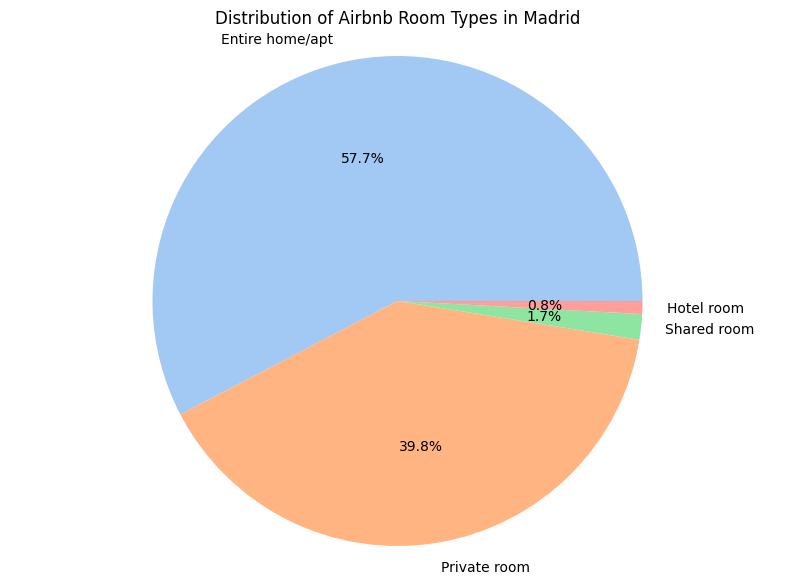


Original Concept vs Entire Places:
Shared/Private Rooms: 8138 (41.48%)
Entire Places: 11314 (57.67%)

Property Type Distribution:
property_type
Entire apartment               9747
Private room in apartment      5771
Private room in house           911
Entire loft                     607
Private room in condominium     358
Name: count, dtype: int64


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('listings_detailed.csv')

# 1. Calculate the distribution of room types
room_type_counts = df['room_type'].value_counts()
room_type_percentages = (df['room_type'].value_counts(normalize=True) * 100).round(2)

print("Room Type Distribution:")
print("\nCounts:")
print(room_type_counts)
print("\nPercentages:")
print(room_type_percentages)

# 2. Create a pie chart for visualization
plt.figure(figsize=(10, 7))
plt.pie(room_type_percentages,
        labels=room_type_percentages.index,
        autopct='%1.1f%%',
        colors=sns.color_palette('pastel'))
plt.title('Distribution of Airbnb Room Types in Madrid')
plt.axis('equal')
plt.show()

# 3. Analyze the original concept (shared rooms + private rooms) vs entire places
shared_private = df[df['room_type'].isin(['Shared room', 'Private room'])]['room_type'].count()
entire_places = df[df['room_type'] == 'Entire home/apt']['room_type'].count()

print("\nOriginal Concept vs Entire Places:")
print(f"Shared/Private Rooms: {shared_private} ({(shared_private/len(df)*100):.2f}%)")
print(f"Entire Places: {entire_places} ({(entire_places/len(df)*100):.2f}%)")

# 4. Additional insights about property types
print("\nProperty Type Distribution:")
property_type_counts = df['property_type'].value_counts().head()
print(property_type_counts)

=== AIRBNB NEIGHBORHOOD ANALYSIS ===

1. DESCRIPTIVE STATISTICS ANALYSIS
-----------------------------------
Total neighborhoods: 128
Mean listings per neighborhood: 153.27
Median listings per neighborhood: 78.00
Standard deviation: 317.42

2. CONCENTRATION ANALYSIS
-------------------------
Gini Coefficient: 0.641
Top 20% Concentration Ratio: 66.99%

Hot Areas (Above Mean + Std Dev):
Embajadores: 2318 listings
Universidad: 1869 listings
Palacio: 1506 listings
Sol: 1125 listings
Justicia: 951 listings
Cortes: 880 listings

3. VISUALIZATION ANALYSIS
-------------------------


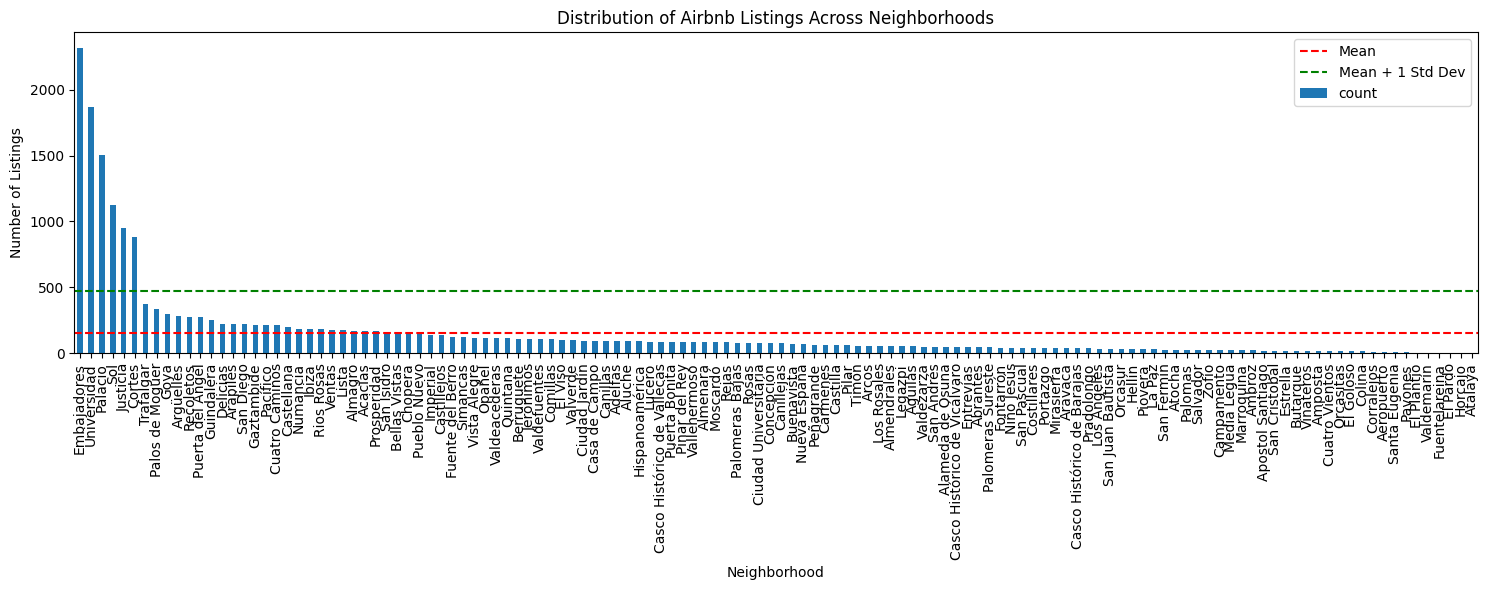


4. PRICE ANALYSIS
----------------
Average Price in Top 5 Neighborhoods:
Embajadores: $139.65
Universidad: $108.40
Palacio: $101.34
Sol: $128.36
Justicia: $108.28

5. STATISTICAL SIGNIFICANCE
---------------------------
Statistically Significant Hot/Cold Areas (|z-score| > 2):
Embajadores: z-score = 6.85
Universidad: z-score = 5.43
Palacio: z-score = 4.28
Sol: z-score = 3.07
Justicia: z-score = 2.52
Cortes: z-score = 2.30


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('listings_detailed.csv')

print("=== AIRBNB NEIGHBORHOOD ANALYSIS ===")

# 1. DESCRIPTIVE STATISTICS ANALYSIS
print("\n1. DESCRIPTIVE STATISTICS ANALYSIS")
print("-----------------------------------")
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
neighborhood_percentages = (df['neighbourhood_cleansed'].value_counts(normalize=True) * 100).round(2)

mean_listings = neighborhood_counts.mean()
median_listings = neighborhood_counts.median()
std_listings = neighborhood_counts.std()

print(f"Total neighborhoods: {len(neighborhood_counts)}")
print(f"Mean listings per neighborhood: {mean_listings:.2f}")
print(f"Median listings per neighborhood: {median_listings:.2f}")
print(f"Standard deviation: {std_listings:.2f}")

# 2. CONCENTRATION ANALYSIS
print("\n2. CONCENTRATION ANALYSIS")
print("-------------------------")

# Gini Coefficient Calculation
def gini_coefficient(x):
    x = np.array(x)
    n = len(x)
    x_sorted = np.sort(x)
    cumx = np.cumsum(x_sorted, dtype=float)
    return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

gini = gini_coefficient(neighborhood_counts.values)
print(f"Gini Coefficient: {gini:.3f}")

# Concentration Ratio
n_top_20_percent = int(len(neighborhood_counts) * 0.2)
concentration_ratio = (neighborhood_counts.head(n_top_20_percent).sum() / neighborhood_counts.sum() * 100)
print(f"Top 20% Concentration Ratio: {concentration_ratio:.2f}%")

# Hot Areas Analysis
hot_areas = neighborhood_counts[neighborhood_counts > (mean_listings + std_listings)]
print("\nHot Areas (Above Mean + Std Dev):")
for area, count in hot_areas.items():
    print(f"{area}: {count} listings")

# 3. VISUALIZATION ANALYSIS
print("\n3. VISUALIZATION ANALYSIS")
print("-------------------------")
plt.figure(figsize=(15, 6))
neighborhood_counts.plot(kind='bar')
plt.title('Distribution of Airbnb Listings Across Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.axhline(y=mean_listings, color='r', linestyle='--', label='Mean')
plt.axhline(y=mean_listings + std_listings, color='g', linestyle='--', label='Mean + 1 Std Dev')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 4. PRICE ANALYSIS
print("\n4. PRICE ANALYSIS")
print("----------------")
df['price_clean'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
avg_price_by_neighborhood = df.groupby('neighbourhood_cleansed')['price_clean'].mean().round(2)

print("Average Price in Top 5 Neighborhoods:")
for neighborhood in neighborhood_counts.head().index:
    avg_price = avg_price_by_neighborhood[neighborhood]
    print(f"{neighborhood}: ${avg_price:.2f}")

# 5. STATISTICAL SIGNIFICANCE
print("\n5. STATISTICAL SIGNIFICANCE")
print("---------------------------")
from scipy import stats

# Calculate z-scores for number of listings
z_scores = stats.zscore(neighborhood_counts)
significant_neighborhoods = pd.Series(z_scores, index=neighborhood_counts.index)
significant_neighborhoods = significant_neighborhoods[abs(significant_neighborhoods) > 2]

print("Statistically Significant Hot/Cold Areas (|z-score| > 2):")
for neighborhood, z_score in significant_neighborhoods.items():
    print(f"{neighborhood}: z-score = {z_score:.2f}")

=== HOST PROPERTY OWNERSHIP ANALYSIS ===

1. DESCRIPTIVE STATISTICS ANALYSIS
---------------------------------
Total number of listings: 19618
Total number of unique hosts: 11325
Average listings per host: 1.73
Median listings per host: 1.00
Standard deviation: 3.84
Maximum listings by a single host: 163

2. HOST CATEGORIZATION ANALYSIS
------------------------------

Host Categories Distribution:
Single listing: 8845 hosts (78.1%)
2 listings: 1320 hosts (11.66%)
3-5 listings: 789 hosts (6.97%)
6-10 listings: 228 hosts (2.01%)
More than 10: 143 hosts (1.26%)

3. TOP HOSTS ANALYSIS
-------------------

Top 10 Hosts by Number of Properties:
Host ID: 377605855 (Name: Marco) - 163 properties
Host ID: 28038703 (Name: Luxury Rentals Madrid) - 113 properties
Host ID: 102196656 (Name: Gabriel) - 101 properties
Host ID: 276565844 (Name: Enrique) - 101 properties
Host ID: 32046323 (Name: Ivory) - 92 properties
Host ID: 107141654 (Name: Leeways) - 88 properties
Host ID: 99018982 (Name: Alterhome)

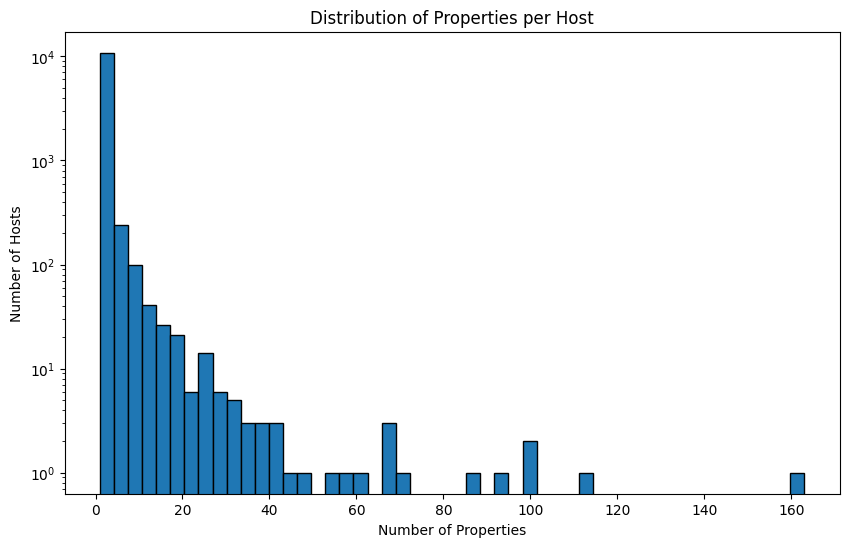


5. CONCENTRATION ANALYSIS
----------------------
Gini Coefficient: 0.384
Percentage of listings owned by top 10% of hosts: 41.03%

6. PROFESSIONAL VS CASUAL HOSTS ANALYSIS
-------------------------------------
Number of professional hosts (>5.6 listings): 371
Percentage of professional hosts: 3.28%
Percentage of listings owned by professional hosts: 27.14%


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Read the CSV file
df = pd.read_csv('listings_detailed.csv')

print("=== HOST PROPERTY OWNERSHIP ANALYSIS ===\n")

# 1. DESCRIPTIVE STATISTICS ANALYSIS
print("1. DESCRIPTIVE STATISTICS ANALYSIS")
print("---------------------------------")
host_listings = df.groupby('host_id').size()

print(f"Total number of listings: {len(df)}")
print(f"Total number of unique hosts: {len(host_listings)}")
print(f"Average listings per host: {host_listings.mean():.2f}")
print(f"Median listings per host: {host_listings.median():.2f}")
print(f"Standard deviation: {host_listings.std():.2f}")
print(f"Maximum listings by a single host: {host_listings.max()}")

# 2. HOST CATEGORIZATION ANALYSIS
print("\n2. HOST CATEGORIZATION ANALYSIS")
print("------------------------------")
host_categories = pd.cut(host_listings,
                        bins=[0, 1, 2, 5, 10, float('inf')],
                        labels=['Single listing', '2 listings', '3-5 listings',
                               '6-10 listings', 'More than 10'])

category_distribution = host_categories.value_counts().sort_index()
category_percentages = (category_distribution / len(host_categories) * 100).round(2)

print("\nHost Categories Distribution:")
for category, percentage in category_percentages.items():
    count = category_distribution[category]
    print(f"{category}: {count} hosts ({percentage}%)")

# 3. TOP HOSTS ANALYSIS
print("\n3. TOP HOSTS ANALYSIS")
print("-------------------")
top_hosts = host_listings.nlargest(10)
print("\nTop 10 Hosts by Number of Properties:")
for host_id, count in top_hosts.items():
    host_name = df[df['host_id'] == host_id]['host_name'].iloc[0]
    print(f"Host ID: {host_id} (Name: {host_name}) - {count} properties")

# 4. VISUALIZATION
print("\n4. VISUALIZATION ANALYSIS")
print("----------------------")
plt.figure(figsize=(10, 6))
plt.hist(host_listings, bins=50, edgecolor='black')
plt.title('Distribution of Properties per Host')
plt.xlabel('Number of Properties')
plt.ylabel('Number of Hosts')
plt.yscale('log')  # Log scale for better visualization
plt.show()

# 5. CONCENTRATION ANALYSIS
print("\n5. CONCENTRATION ANALYSIS")
print("----------------------")
def gini_coefficient(x):
    x = np.array(x)
    n = len(x)
    x_sorted = np.sort(x)
    cumx = np.cumsum(x_sorted, dtype=float)
    return (n + 1 - 2 * np.sum(cumx) / cumx[-1]) / n

gini = gini_coefficient(host_listings.values)
print(f"Gini Coefficient: {gini:.3f}")

# Calculate what percentage of listings are owned by top 10% of hosts
top_10_percent_hosts = int(len(host_listings) * 0.1)
listings_by_top_10_percent = host_listings.nlargest(top_10_percent_hosts).sum()
concentration_ratio = (listings_by_top_10_percent / len(df) * 100)
print(f"Percentage of listings owned by top 10% of hosts: {concentration_ratio:.2f}%")

# 6. PROFESSIONAL VS CASUAL HOSTS ANALYSIS
print("\n6. PROFESSIONAL VS CASUAL HOSTS ANALYSIS")
print("-------------------------------------")
professional_threshold = host_listings.mean() + host_listings.std()
professional_hosts = host_listings[host_listings > professional_threshold]
print(f"Number of professional hosts (>{professional_threshold:.1f} listings): {len(professional_hosts)}")
print(f"Percentage of professional hosts: {(len(professional_hosts)/len(host_listings)*100):.2f}%")
print(f"Percentage of listings owned by professional hosts: {(professional_hosts.sum()/len(df)*100):.2f}%")

=== PRICE ANALYSIS BY LISTING LANGUAGE ===



<ipython-input-6-fd03191443ad>:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['is_english'] = df['description'].str.contains(english_words, case=False, na=False)
<ipython-input-6-fd03191443ad>:22: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['is_spanish'] = df['description'].str.contains(spanish_words, case=False, na=False)


1. OVERALL PRICE COMPARISON
--------------------------

Price Statistics by Language:
                        mean  median  count         std
listing_language                                       
English           142.771372    68.0   5568  508.828656
Mixed             127.587689    56.0  10332  515.319474
Spanish           113.734804    50.0   3718  332.691697

t-statistic: 3.0690
p-value: 0.0022

2. NEIGHBORHOOD PRICE ANALYSIS
-----------------------------

Top 10 Neighborhoods with Largest Price Differences:
listing_language        neighbourhood_cleansed  difference_percentage
39                                  Corralejos                1257.89
12                            Apostol Santiago                1042.54
11                                     Amposta                 918.47
45                                    Delicias                 617.03
107                                  San Diego                 445.26
29                Casco Histórico de Vicálvaro               

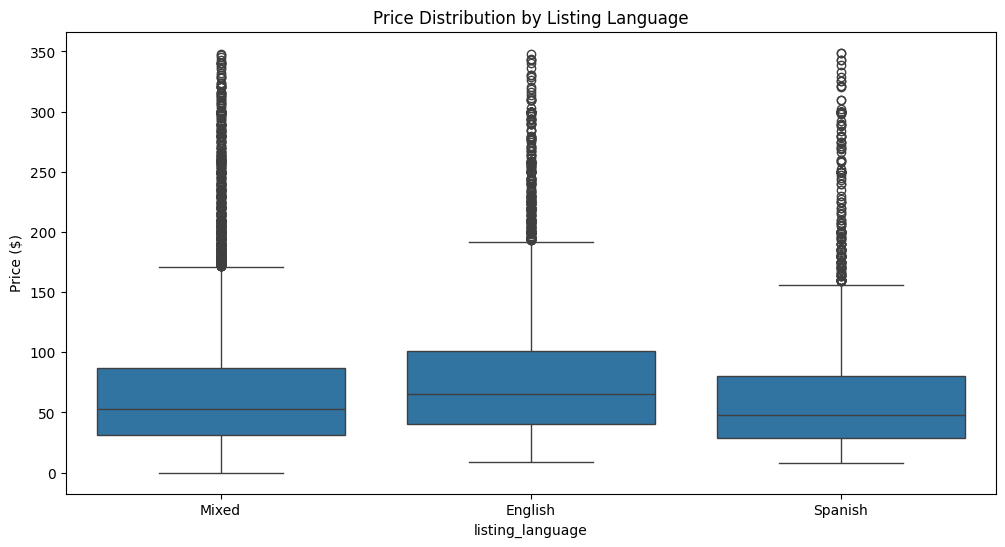


3. STATISTICAL ANALYSIS BY NEIGHBORHOOD
------------------------------------


ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.

In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('listings_detailed.csv')

print("=== PRICE ANALYSIS BY LISTING LANGUAGE ===\n")

# 1. PREPARE THE DATA
# Clean price column
df['price_clean'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Identify language based on description
# Looking for common English words while excluding common Spanish words
english_words = r'\b(the|and|in|is|it|for|with|this|that|have)\b'
spanish_words = r'\b(el|la|los|las|en|es|para|con|este|esta|tienen|muy)\b'

df['is_english'] = df['description'].str.contains(english_words, case=False, na=False)
df['is_spanish'] = df['description'].str.contains(spanish_words, case=False, na=False)

# Filter out ambiguous cases (both languages or neither)
df['listing_language'] = np.where(df['is_english'] & ~df['is_spanish'], 'English',
                                 np.where(~df['is_english'] & df['is_spanish'], 'Spanish', 'Mixed'))

# 2. OVERALL PRICE COMPARISON
print("1. OVERALL PRICE COMPARISON")
print("--------------------------")
price_by_language = df.groupby('listing_language')['price_clean'].agg(['mean', 'median', 'count', 'std'])
print("\nPrice Statistics by Language:")
print(price_by_language)

# Perform t-test between English and Spanish listings
eng_prices = df[df['listing_language'] == 'English']['price_clean']
spa_prices = df[df['listing_language'] == 'Spanish']['price_clean']
t_stat, p_value = stats.ttest_ind(eng_prices, spa_prices)

print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# 3. NEIGHBORHOOD ANALYSIS
print("\n2. NEIGHBORHOOD PRICE ANALYSIS")
print("-----------------------------")
neighborhood_language_price = df.groupby(['neighbourhood_cleansed', 'listing_language'])['price_clean'].agg(['mean', 'count']).reset_index()

# Calculate price difference by neighborhood
price_diff_by_neighborhood = neighborhood_language_price.pivot(
    index='neighbourhood_cleansed',
    columns='listing_language',
    values='mean'
).reset_index()

price_diff_by_neighborhood['price_difference'] = price_diff_by_neighborhood['English'] - price_diff_by_neighborhood['Spanish']
price_diff_by_neighborhood['difference_percentage'] = (
    (price_diff_by_neighborhood['English'] - price_diff_by_neighborhood['Spanish']) /
    price_diff_by_neighborhood['Spanish'] * 100
)

# Sort by absolute price difference
significant_differences = price_diff_by_neighborhood.sort_values('difference_percentage', ascending=False)

print("\nTop 10 Neighborhoods with Largest Price Differences:")
print(significant_differences.head(10)[['neighbourhood_cleansed', 'difference_percentage']].round(2))

# 4. VISUALIZATION
plt.figure(figsize=(12, 6))
sns.boxplot(x='listing_language', y='price_clean', data=df[df['price_clean'] < df['price_clean'].quantile(0.95)])
plt.title('Price Distribution by Listing Language')
plt.ylabel('Price ($)')
plt.show()

# 5. STATISTICAL ANALYSIS BY NEIGHBORHOOD
print("\n3. STATISTICAL ANALYSIS BY NEIGHBORHOOD")
print("------------------------------------")

def calculate_neighborhood_ttest(neighborhood):
    neighborhood_data = df[df['neighbourhood_cleansed'] == neighborhood]
    eng_prices = neighborhood_data[neighborhood_data['listing_language'] == 'English']['price_clean']
    spa_prices = neighborhood_data[neighborhood_data['listing_language'] == 'Spanish']['price_clean']

    if len(eng_prices) > 0 and len(spa_prices) > 0:
        t_stat, p_value = stats.ttest_ind(eng_prices, spa_prices)
        return pd.Series({'t_statistic': t_stat, 'p_value': p_value})
    return pd.Series({'t_statistic': np.nan, 'p_value': np.nan})

neighborhood_stats = df.groupby('neighbourhood_cleansed').apply(calculate_neighborhood_ttest)
significant_neighborhoods = neighborhood_stats[neighborhood_stats['p_value'] < 0.05]

print("\nNeighborhoods with Statistically Significant Price Differences (p < 0.05):")
print(significant_neighborhoods.sort_values('p_value'))

# 6. PRICE RATIO ANALYSIS
print("\n4. PRICE RATIO ANALYSIS")
print("---------------------")
price_ratio_by_neighborhood = (
    price_diff_by_neighborhood[price_diff_by_neighborhood['English'].notna() &
                             price_diff_by_neighborhood['Spanish'].notna()]
    .assign(price_ratio=lambda x: x['English'] / x['Spanish'])
    .sort_values('price_ratio', ascending=False)
)

print("\nPrice Ratios (English/Spanish) by Neighborhood:")
print(price_ratio_by_neighborhood[['neighbourhood_cleansed', 'price_ratio']].head(10).round(2))

=== PRICE ANALYSIS BY LISTING LANGUAGE ===



<ipython-input-7-80c4fd849621>:20: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['is_english'] = df['description'].str.contains(english_words, case=False, na=False)
<ipython-input-7-80c4fd849621>:21: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['is_spanish'] = df['description'].str.contains(spanish_words, case=False, na=False)


1. OVERALL PRICE COMPARISON
--------------------------

Price Statistics by Language:
                        mean  median  count         std
listing_language                                       
English           142.771372    68.0   5568  508.828656
Mixed             127.587689    56.0  10332  515.319474
Spanish           113.734804    50.0   3718  332.691697

2. NEIGHBORHOOD ANALYSIS WITH STATISTICAL TESTING
---------------------------------------------


<ipython-input-7-80c4fd849621>:68: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  neighborhood_analysis = df.groupby('neighbourhood_cleansed').apply(analyze_neighborhood_prices)



Neighborhoods with Significant Price Differences (p < 0.05):

Top 10 Neighborhoods with Highest Price Differences:
                              english_mean  spanish_mean  price_difference  \
neighbourhood_cleansed                                                       
San Diego                           178.55         32.75            145.81   
Casco Histórico de Vicálvaro        202.82         38.40            164.42   
Vallehermoso                        282.05         64.84            217.21   
Casco Histórico de Vallecas         251.80         58.13            193.67   
Aguilas                             171.38         41.55            129.83   
Mirasierra                          161.82         50.56            111.26   
Ventas                              175.47         65.10            110.38   
Berruguete                          132.05         51.13             80.92   
Imperial                            145.61         65.45             80.16   
Cuatro Caminos            

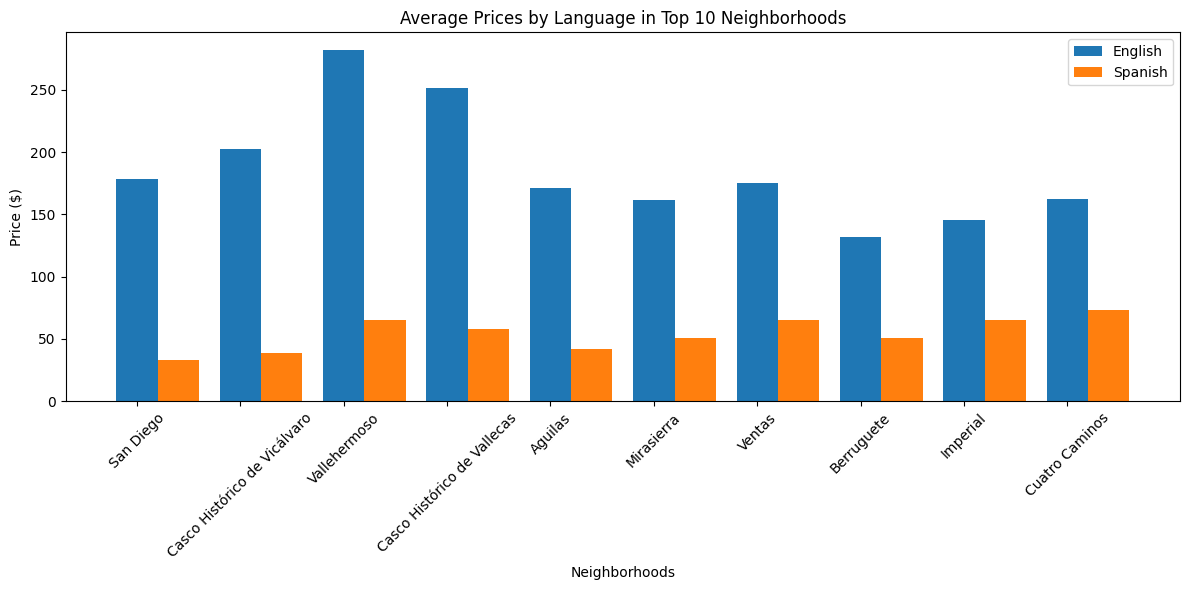


3. SUMMARY OF FINDINGS
--------------------
Total neighborhoods analyzed: 128
Neighborhoods with significant price differences: 15
Average price difference (%): 204.08%
Maximum price difference (%): 445.26%
Minimum price difference (%): 60.30%


In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('listings_detailed.csv')

print("=== PRICE ANALYSIS BY LISTING LANGUAGE ===\n")

# 1. PREPARE THE DATA
# Clean price column
df['price_clean'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Identify language based on description
english_words = r'\b(the|and|in|is|it|for|with|this|that|have)\b'
spanish_words = r'\b(el|la|los|las|en|es|para|con|este|esta|tienen|muy)\b'

df['is_english'] = df['description'].str.contains(english_words, case=False, na=False)
df['is_spanish'] = df['description'].str.contains(spanish_words, case=False, na=False)

# Filter out ambiguous cases (both languages or neither)
df['listing_language'] = np.where(df['is_english'] & ~df['is_spanish'], 'English',
                                 np.where(~df['is_english'] & df['is_spanish'], 'Spanish', 'Mixed'))

# 2. OVERALL PRICE COMPARISON
print("1. OVERALL PRICE COMPARISON")
print("--------------------------")
price_by_language = df.groupby('listing_language')['price_clean'].agg(['mean', 'median', 'count', 'std'])
print("\nPrice Statistics by Language:")
print(price_by_language)

# 3. NEIGHBORHOOD ANALYSIS WITH STATISTICAL TESTING
print("\n2. NEIGHBORHOOD ANALYSIS WITH STATISTICAL TESTING")
print("---------------------------------------------")

# Create a function to analyze price differences for a neighborhood
def analyze_neighborhood_prices(neighborhood_data):
    eng_data = neighborhood_data[neighborhood_data['listing_language'] == 'English']['price_clean']
    spa_data = neighborhood_data[neighborhood_data['listing_language'] == 'Spanish']['price_clean']

    if len(eng_data) >= 5 and len(spa_data) >= 5:  # Ensure minimum sample size
        t_stat, p_value = stats.ttest_ind(eng_data, spa_data)
        eng_mean = eng_data.mean()
        spa_mean = spa_data.mean()
        price_diff = eng_mean - spa_mean
        price_diff_pct = (price_diff / spa_mean * 100) if spa_mean != 0 else np.nan

        return pd.Series({
            'english_mean': eng_mean,
            'spanish_mean': spa_mean,
            'price_difference': price_diff,
            'price_difference_pct': price_diff_pct,
            'english_count': len(eng_data),
            'spanish_count': len(spa_data),
            't_statistic': t_stat,
            'p_value': p_value
        })
    return pd.Series({
        'english_mean': np.nan, 'spanish_mean': np.nan,
        'price_difference': np.nan, 'price_difference_pct': np.nan,
        'english_count': len(eng_data), 'spanish_count': len(spa_data),
        't_statistic': np.nan, 'p_value': np.nan
    })

# Apply the analysis to each neighborhood
neighborhood_analysis = df.groupby('neighbourhood_cleansed').apply(analyze_neighborhood_prices)

# Filter for significant results
significant_results = neighborhood_analysis[
    (neighborhood_analysis['p_value'] < 0.05) &
    (neighborhood_analysis['english_count'] >= 5) &
    (neighborhood_analysis['spanish_count'] >= 5)
].sort_values('price_difference_pct', ascending=False)

print("\nNeighborhoods with Significant Price Differences (p < 0.05):")
print("\nTop 10 Neighborhoods with Highest Price Differences:")
significant_results_display = significant_results[
    ['english_mean', 'spanish_mean', 'price_difference',
     'price_difference_pct', 'english_count', 'spanish_count', 'p_value']
].head(10).round(2)
print(significant_results_display)

# 4. VISUALIZATION
plt.figure(figsize=(12, 6))
for language in ['English', 'Spanish']:
    data = significant_results_display[f'{language.lower()}_mean']
    plt.bar(np.arange(len(data)) + (0.4 if language == 'Spanish' else 0),
            data, width=0.4, label=language)

plt.title('Average Prices by Language in Top 10 Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Price ($)')
plt.xticks(np.arange(len(significant_results_display.index)),
           significant_results_display.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# 5. SUMMARY STATISTICS
print("\n3. SUMMARY OF FINDINGS")
print("--------------------")
print(f"Total neighborhoods analyzed: {len(neighborhood_analysis)}")
print(f"Neighborhoods with significant price differences: {len(significant_results)}")
print(f"Average price difference (%): {significant_results['price_difference_pct'].mean():.2f}%")
print(f"Maximum price difference (%): {significant_results['price_difference_pct'].max():.2f}%")
print(f"Minimum price difference (%): {significant_results['price_difference_pct'].min():.2f}%")

<ipython-input-8-0f30e6558e66>:17: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['is_english'] = df['description'].str.contains(english_words, case=False, na=False)
<ipython-input-8-0f30e6558e66>:18: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df['is_spanish'] = df['description'].str.contains(spanish_words, case=False, na=False)


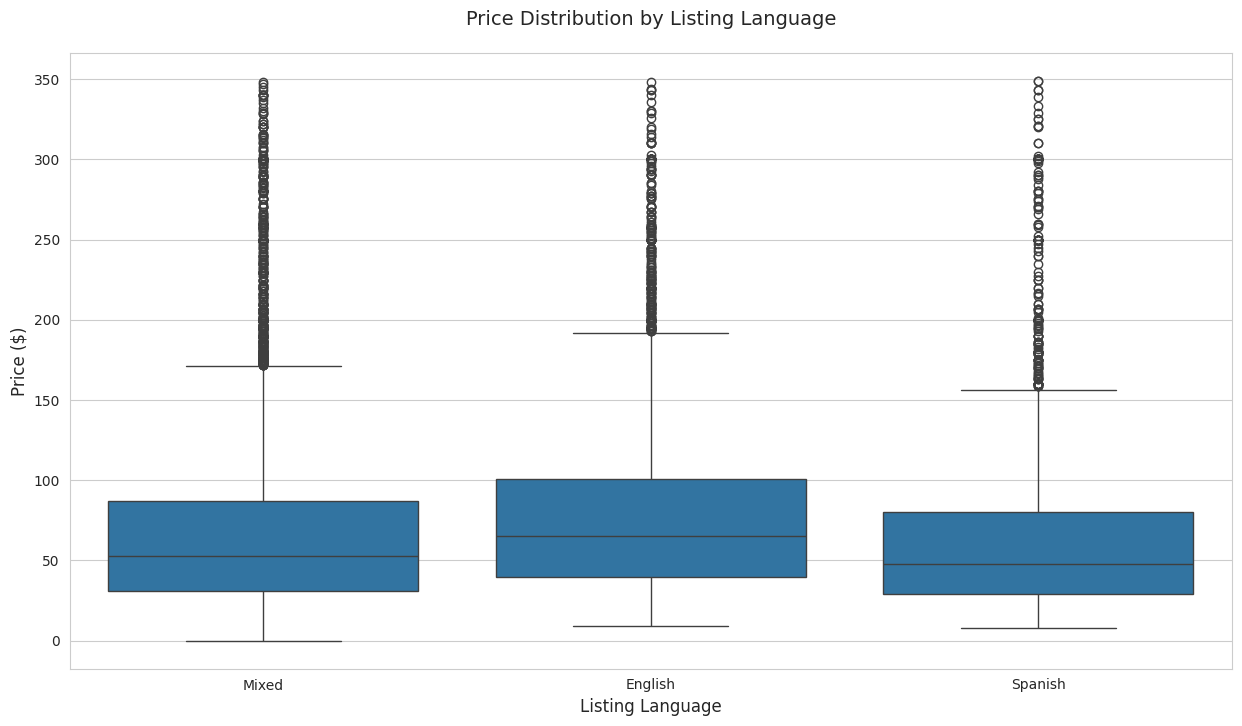

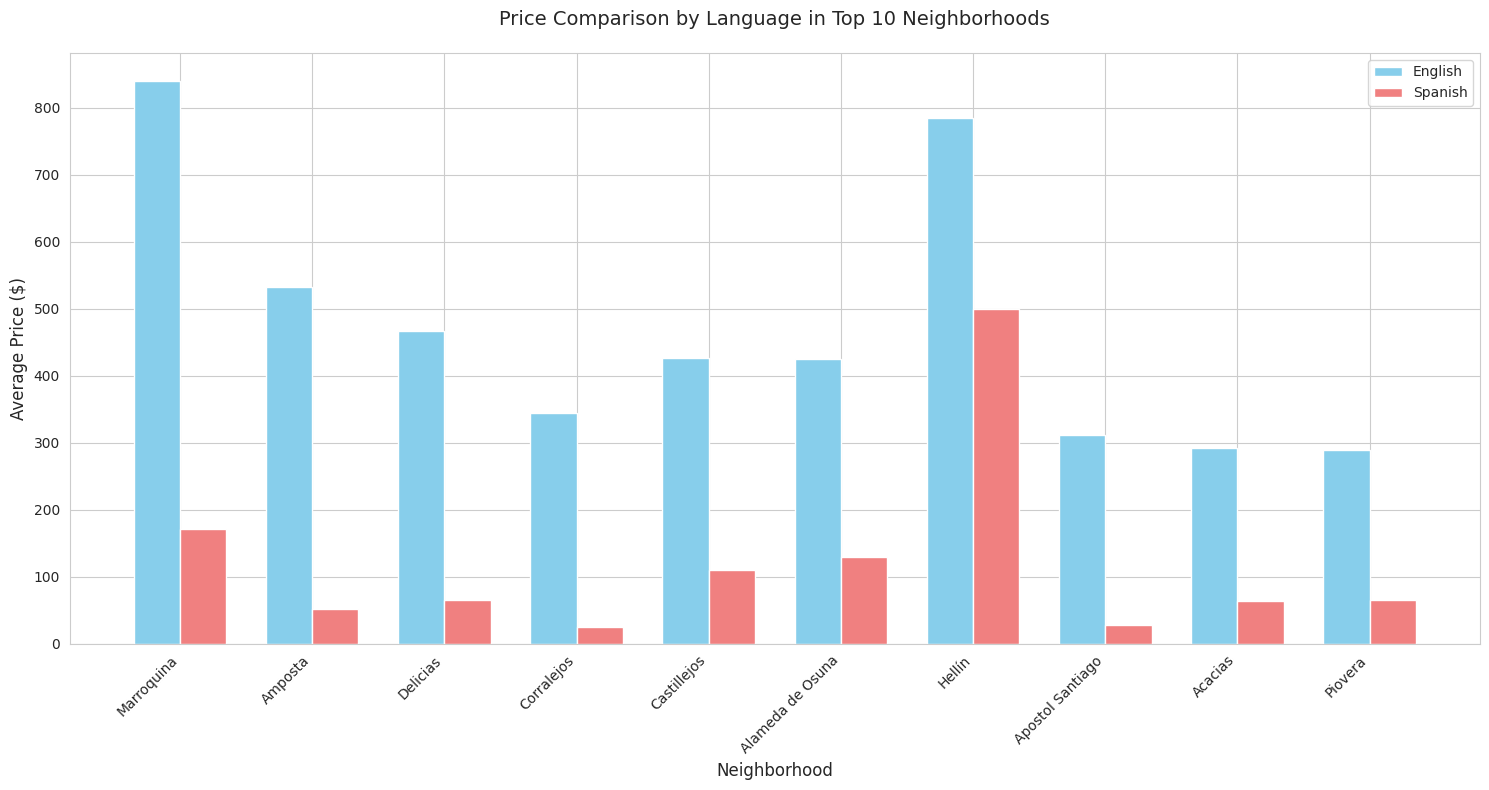

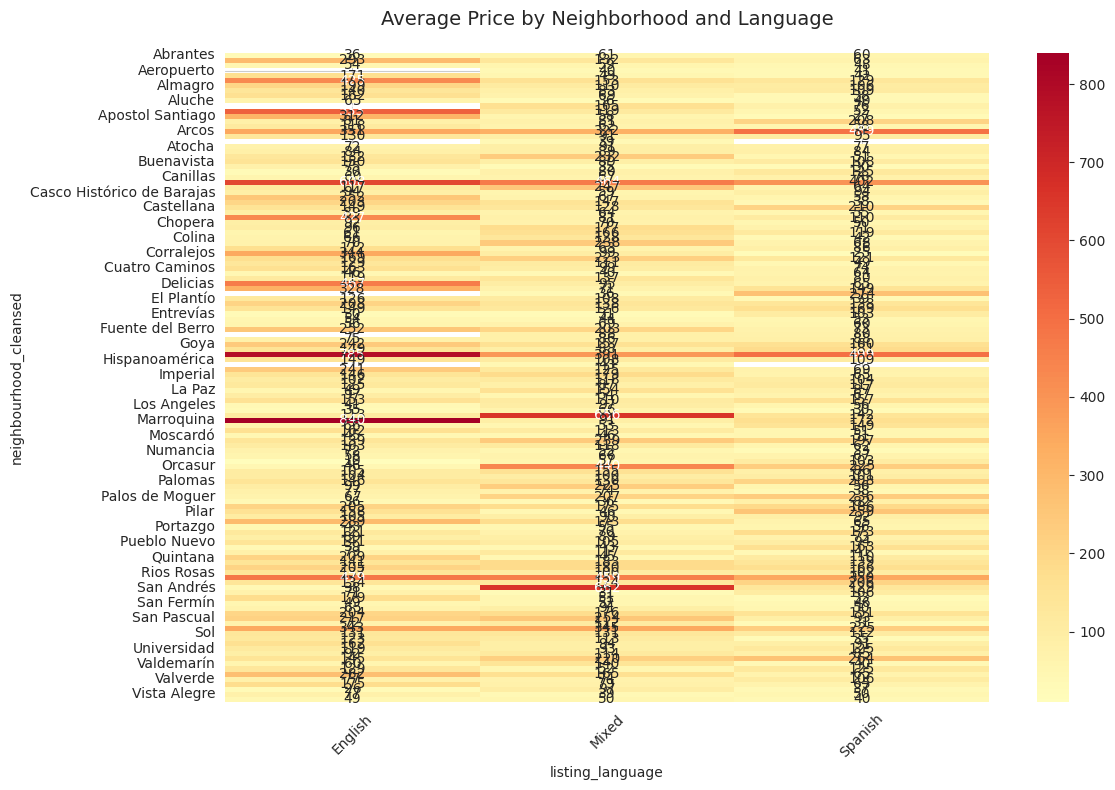

<ipython-input-8-0f30e6558e66>:81: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Listing Language')


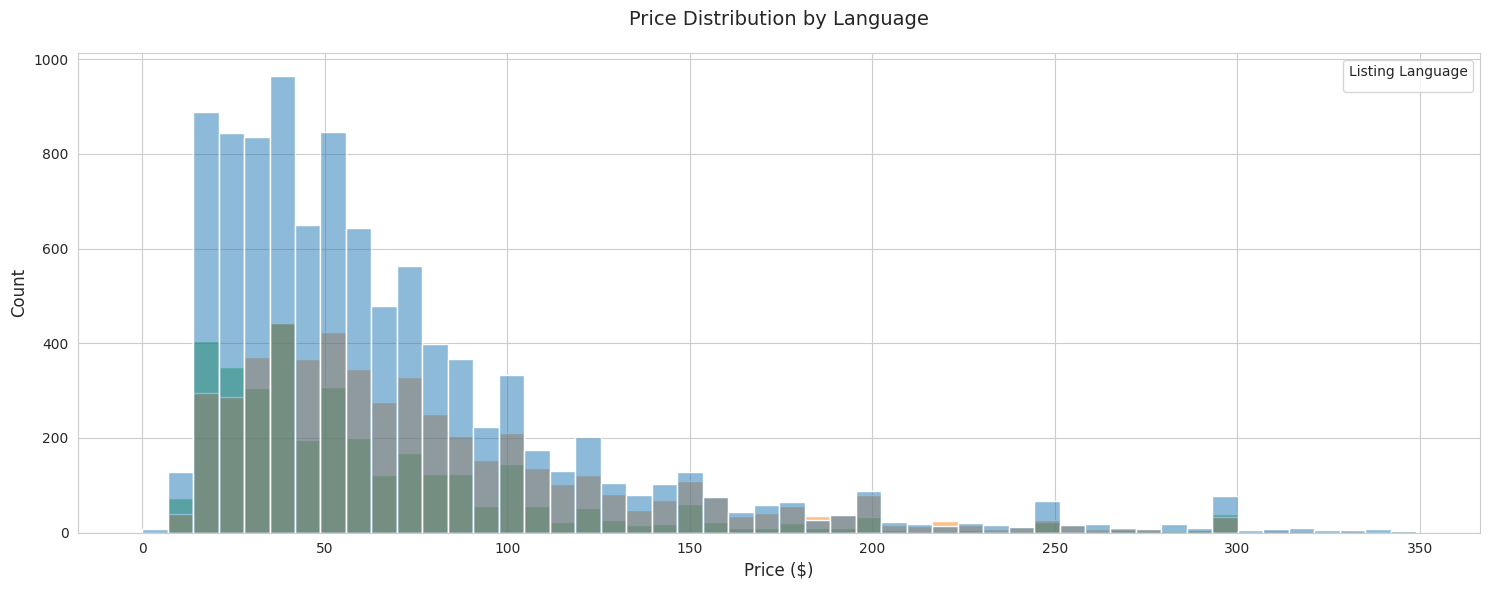


Summary Statistics:
                    mean  median     std  count
listing_language                               
English           142.77    68.0  508.83   5568
Mixed             127.59    56.0  515.32  10332
Spanish           113.73    50.0  332.69   3718

t-test Results:
t-statistic: 3.0690
p-value: 0.0022


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Read the data
df = pd.read_csv('/content/listings_detailed.csv')

# Clean price column
df['price_clean'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Identify language based on description
english_words = r'\b(the|and|in|is|it|for|with|this|that|have)\b'
spanish_words = r'\b(el|la|los|las|en|es|para|con|este|esta|tienen|muy)\b'

df['is_english'] = df['description'].str.contains(english_words, case=False, na=False)
df['is_spanish'] = df['description'].str.contains(spanish_words, case=False, na=False)
df['listing_language'] = np.where(df['is_english'] & ~df['is_spanish'], 'English',
                                 np.where(~df['is_english'] & df['is_spanish'], 'Spanish', 'Mixed'))

# Create figure 1: Overall Price Distribution by Language
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")
sns.boxplot(x='listing_language', y='price_clean', data=df[df['price_clean'] < df['price_clean'].quantile(0.95)])
plt.title('Price Distribution by Listing Language', pad=20, fontsize=14)
plt.xlabel('Listing Language', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.show()

# Calculate neighborhood statistics
neighborhood_stats = df.groupby(['neighbourhood_cleansed', 'listing_language'])['price_clean'].agg(['mean', 'count']).reset_index()
pivot_stats = neighborhood_stats.pivot(index='neighbourhood_cleansed',
                                     columns='listing_language',
                                     values='mean').reset_index()
pivot_stats['price_difference'] = pivot_stats['English'] - pivot_stats['Spanish']
pivot_stats = pivot_stats.sort_values('price_difference', ascending=False)

# Create figure 2: Top 10 Neighborhoods Price Comparison
plt.figure(figsize=(15, 8))
top_10_neighborhoods = pivot_stats.head(10)

x = np.arange(len(top_10_neighborhoods))
width = 0.35

plt.bar(x - width/2, top_10_neighborhoods['English'], width, label='English', color='skyblue')
plt.bar(x + width/2, top_10_neighborhoods['Spanish'], width, label='Spanish', color='lightcoral')

plt.xlabel('Neighborhood', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.title('Price Comparison by Language in Top 10 Neighborhoods', pad=20, fontsize=14)
plt.xticks(x, top_10_neighborhoods['neighbourhood_cleansed'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Create figure 3: Price Difference Heatmap
pivot_table = df.pivot_table(
    values='price_clean',
    index='neighbourhood_cleansed',
    columns='listing_language',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='RdYlBu_r', center=0)
plt.title('Average Price by Neighborhood and Language', pad=20, fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Create figure 4: Price Difference Distribution
plt.figure(figsize=(15, 6))
sns.histplot(data=df[df['price_clean'] < df['price_clean'].quantile(0.95)],
             x='price_clean', hue='listing_language',
             multiple="layer", bins=50)
plt.title('Price Distribution by Language', pad=20, fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Listing Language')
plt.tight_layout()
plt.show()

# Calculate and print summary statistics
summary_stats = df.groupby('listing_language')['price_clean'].agg(['mean', 'median', 'std', 'count']).round(2)
print("\nSummary Statistics:")
print(summary_stats)

# Perform t-test between English and Spanish listings
eng_prices = df[df['listing_language'] == 'English']['price_clean']
spa_prices = df[df['listing_language'] == 'Spanish']['price_clean']
t_stat, p_value = stats.ttest_ind(eng_prices, spa_prices)
print(f"\nt-test Results:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

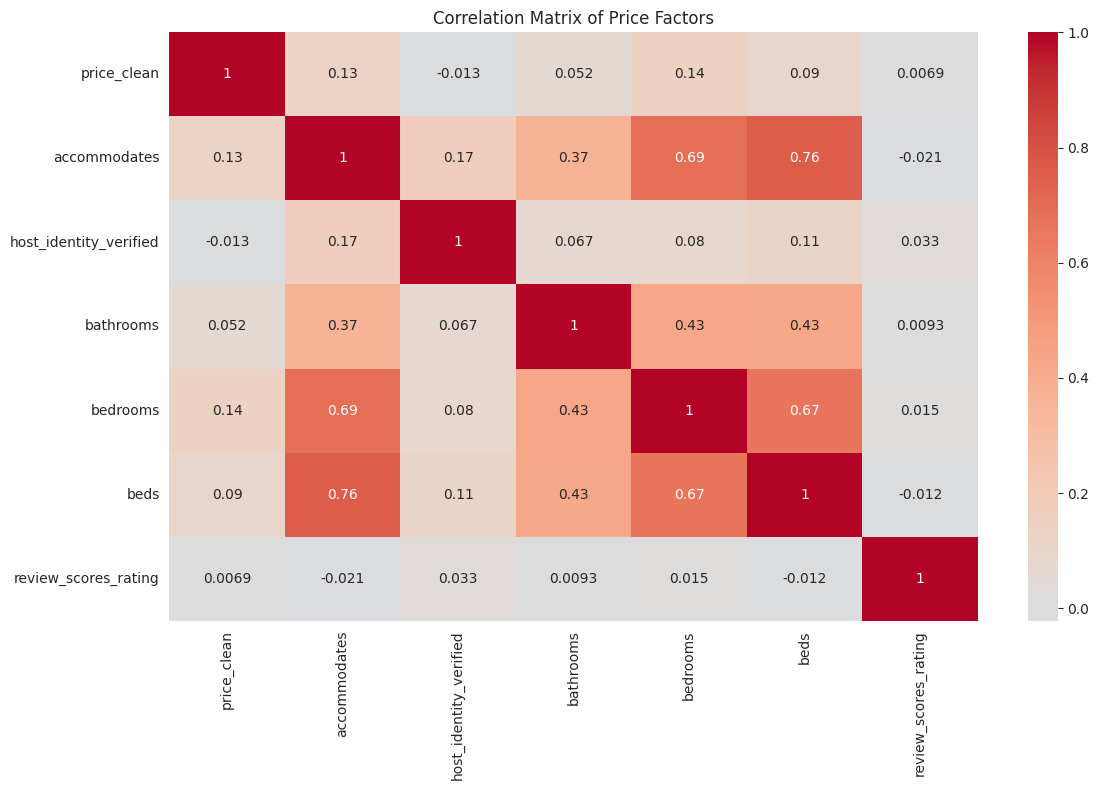

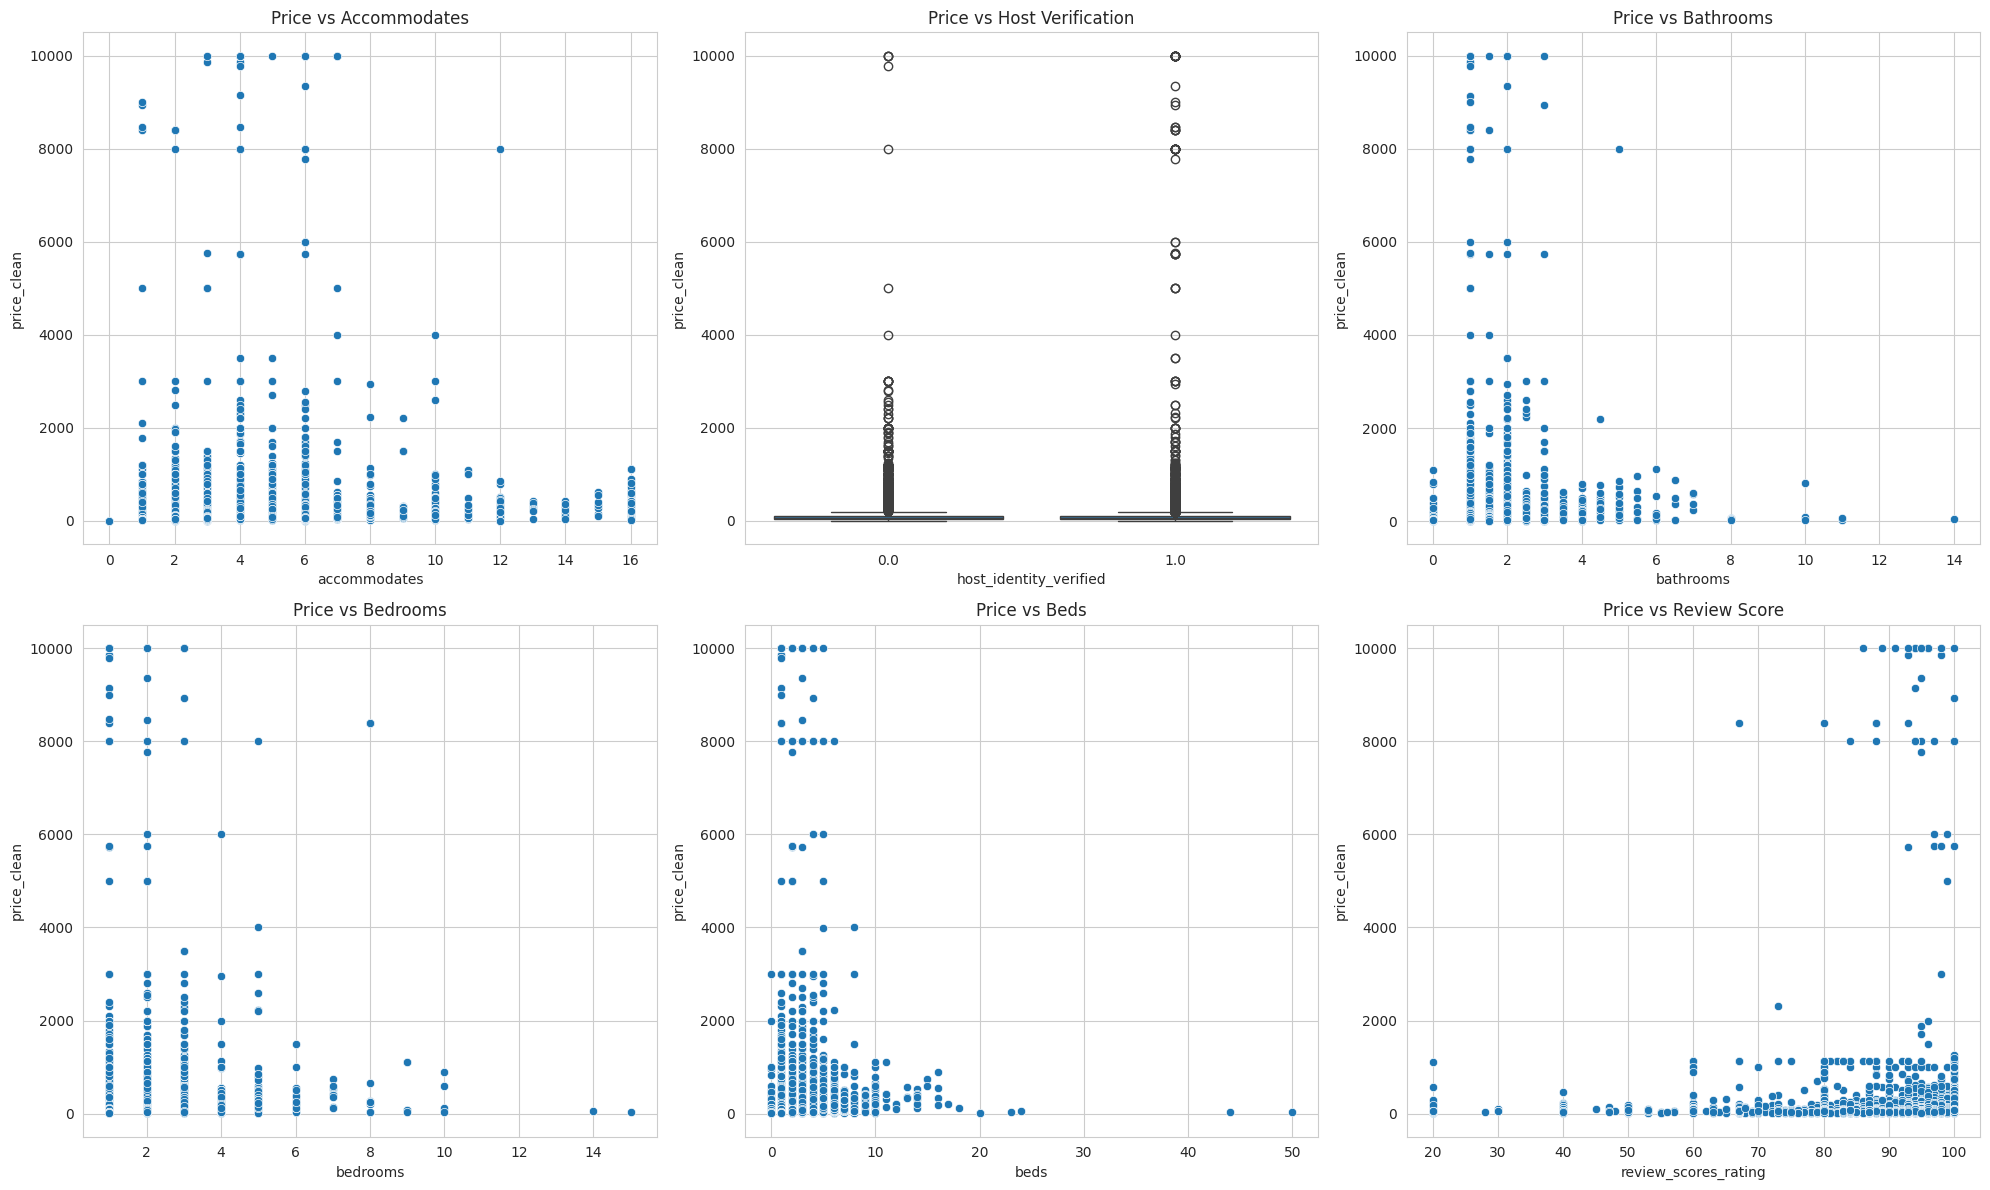


Statistical Analysis of Price Factors:
--------------------------------------------------

Correlations with Price:
price_clean               1.000000
bedrooms                  0.143674
accommodates              0.128984
beds                      0.090044
bathrooms                 0.052288
review_scores_rating      0.006931
host_identity_verified   -0.012847
Name: price_clean, dtype: float64

Verified vs Unverified Host T-Test:
t-statistic: -1.7752
p-value: 0.0759

Standardized Regression Coefficients:
                  Feature  Standardized Coefficient
3                bedrooms                 65.889824
0            accommodates                 38.323905
1  host_identity_verified                  5.443900
5    review_scores_rating                  4.922492
2               bathrooms                 -3.712387
4                    beds                -27.676893

R-squared: 0.0248

Average Prices by Factor Levels:

Verified vs Unverified Hosts:
host_identity_verified
0.0    136.978032
1.

<ipython-input-9-d7dd53eee8a3>:119: RuntimeWarning: divide by zero encountered in divide
  x_pct_change = np.diff(x) / x[:-1]
<ipython-input-9-d7dd53eee8a3>:120: RuntimeWarning: divide by zero encountered in divide
  y_pct_change = np.diff(y) / y[:-1]
<ipython-input-9-d7dd53eee8a3>:121: RuntimeWarning: invalid value encountered in divide
  return np.mean(y_pct_change / x_pct_change)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Read and prepare the data
df = pd.read_csv('/content/listings_detailed.csv')

# Clean price column
df['price_clean'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Select features for analysis
features = ['accommodates', 'host_identity_verified', 'bathrooms_text',
           'bedrooms', 'beds', 'review_scores_rating']

# Clean and prepare data
df['host_identity_verified'] = df['host_identity_verified'].map({'t': 1, 'f': 0})
df['bathrooms'] = df['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)

# Create correlation analysis
analysis_df = df[['price_clean', 'accommodates', 'host_identity_verified',
                  'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']].copy()

# 1. Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = analysis_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Price Factors')
plt.tight_layout()
plt.show()

# 2. Individual Factor Analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

# Accommodates vs Price
sns.scatterplot(data=df, x='accommodates', y='price_clean', ax=axes[0])
axes[0].set_title('Price vs Accommodates')

# Verified Host vs Price
sns.boxplot(data=df, x='host_identity_verified', y='price_clean', ax=axes[1])
axes[1].set_title('Price vs Host Verification')

# Bathrooms vs Price
sns.scatterplot(data=df, x='bathrooms', y='price_clean', ax=axes[2])
axes[2].set_title('Price vs Bathrooms')

# Bedrooms vs Price
sns.scatterplot(data=df, x='bedrooms', y='price_clean', ax=axes[3])
axes[3].set_title('Price vs Bedrooms')

# Beds vs Price
sns.scatterplot(data=df, x='beds', y='price_clean', ax=axes[4])
axes[4].set_title('Price vs Beds')

# Review Score vs Price
sns.scatterplot(data=df, x='review_scores_rating', y='price_clean', ax=axes[5])
axes[5].set_title('Price vs Review Score')

plt.tight_layout()
plt.show()

# 3. Statistical Analysis
print("\nStatistical Analysis of Price Factors:")
print("-" * 50)

# Correlation Analysis
correlations = analysis_df.corr()['price_clean'].sort_values(ascending=False)
print("\nCorrelations with Price:")
print(correlations)

# Impact of Verified Host (T-Test)
verified_prices = df[df['host_identity_verified'] == 1]['price_clean']
unverified_prices = df[df['host_identity_verified'] == 0]['price_clean']
t_stat, p_value = stats.ttest_ind(verified_prices, unverified_prices)
print("\nVerified vs Unverified Host T-Test:")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Multiple Linear Regression
X = analysis_df.dropna()[['accommodates', 'host_identity_verified', 'bathrooms',
                         'bedrooms', 'beds', 'review_scores_rating']]
y = analysis_df.dropna()['price_clean']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Fit regression
model = LinearRegression()
model.fit(X_scaled, y)

# Print regression coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Standardized Coefficient': model.coef_
})
print("\nStandardized Regression Coefficients:")
print(coefficients.sort_values('Standardized Coefficient', ascending=False))

# R-squared value
r_squared = model.score(X_scaled, y)
print(f"\nR-squared: {r_squared:.4f}")

# Calculate average prices
print("\nAverage Prices by Factor Levels:")
print("\nVerified vs Unverified Hosts:")
print(df.groupby('host_identity_verified')['price_clean'].mean())

print("\nAverage Price by Number of Accommodates:")
print(df.groupby('accommodates')['price_clean'].mean().head())

# Price elasticity
def calculate_elasticity(x, y):
    x_pct_change = np.diff(x) / x[:-1]
    y_pct_change = np.diff(y) / y[:-1]
    return np.mean(y_pct_change / x_pct_change)

# Calculate average prices for each accommodates value
avg_prices_by_accommodates = df.groupby('accommodates')['price_clean'].mean()
elasticity = calculate_elasticity(avg_prices_by_accommodates.index.values,
                                avg_prices_by_accommodates.values)

print(f"\nPrice Elasticity with respect to Accommodates: {elasticity:.4f}")